In [1]:
import os, shutil
original_dataset_dir = 'D:\Batman\Pictures\cats_vs_dogs\dataset'#расположение папки с картинками на моём пк
base_dir = 'D:\Batman\Pictures\cats_vs_dogs\dataset_smal'#будущее расположение каталога с небольшой выбаркой картинок
os.mkdir(base_dir)#os.mkdir(path, mode=0o777, *, dir_fd=None) - создаёт директорию. OSError, если директория существует.
train_dir = os.path.join(base_dir, 'train')#соединяет пути с учётом особенностей операционной системы.
os.mkdir(train_dir)#создаем директорию полный путь к которой D:\Batman\Pictures\cats_vs_dogs\dataset_smal\train_dir
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [2]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [3]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set\cats', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)


In [4]:
 print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set\cats', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst) 
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set\cats', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set\dogs', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set\dogs', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(r'D:\Batman\Pictures\cats_vs_dogs\dataset\training_set\dogs', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=4,
 validation_data=validation_generator,
 validation_steps=50)

Epoch 1/4
100/100 [==============================] - 8s 82ms/step - loss: 5.9835e-04 - acc: 1.0000 - val_loss: 2.3967 - val_acc: 0.7180
Epoch 2/4
100/100 [==============================] - 8s 79ms/step - loss: 4.2751e-06 - acc: 1.0000 - val_loss: 2.4979 - val_acc: 0.7230
Epoch 3/4
100/100 [==============================] - 8s 83ms/step - loss: 0.0015 - acc: 0.9990 - val_loss: 2.4735 - val_acc: 0.7280
Epoch 4/4
100/100 [==============================] - 9s 88ms/step - loss: 1.0577e-06 - acc: 1.0000 - val_loss: 2.5816 - val_acc: 0.7210


In [23]:
model.save('cats_and_dogs_small_1.h5')

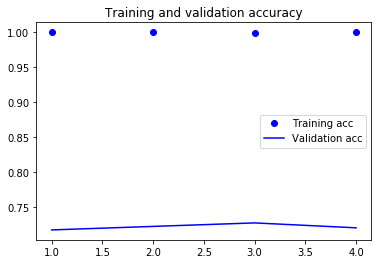

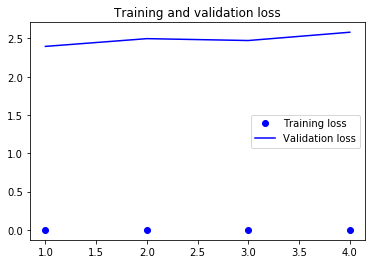

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
model_json=model.to_json()
json_file=open("cat_vs_dogs_1.json", "w")
json_file.write(model_json)
json_file.close()

In [26]:
datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

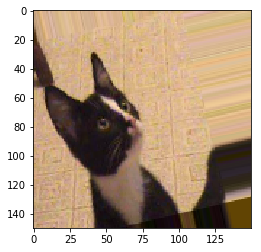

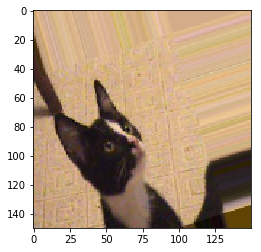

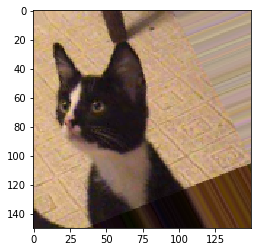

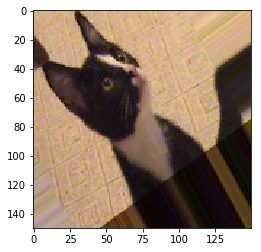

In [29]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
 fname in os.listdir(train_cats_dir)]
img_path = fnames[55]# Вывод случайного изображения в качестве примера
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) 
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150), 
 batch_size=32,
 class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=32,
 class_mode='binary')
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=100,
 validation_data=validation_generator,
 validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 26s 258ms/step - loss: 0.6922 - acc: 0.5256 - val_loss: 0.6750 - val_acc: 0.5844
Epoch 2/100
100/100 [==============================] - 22s 225ms/step - loss: 0.6749 - acc: 0.5735 - val_loss: 0.6928 - val_acc: 0.5374
Epoch 3/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6656 - acc: 0.5863 - val_loss: 0.6391 - val_acc: 0.6371
Epoch 4/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6459 - acc: 0.6144 - val_loss: 0.6300 - val_acc: 0.6334
Epoch 5/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6302 - acc: 0.6406 - val_loss: 0.6001 - val_acc: 0.6694
Epoch 6/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6185 - acc: 0.6519 - val_loss: 0.6340 - val_acc: 0.6198
Epoch 7/100
100/100 [==============================] - 22s 221ms/step - loss: 0.5940 - acc: 0.6800 -

In [32]:
model.save('cats_and_dogs_small_2.h5')

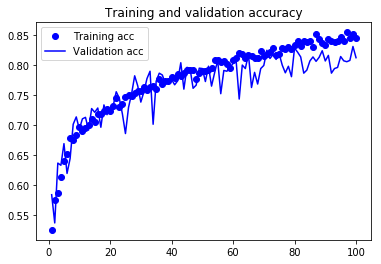

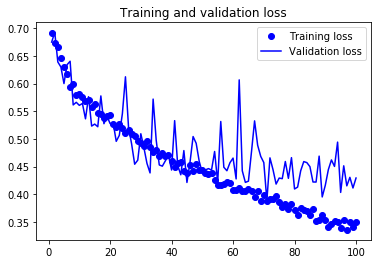

In [33]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()